## Importing the Required Libraries

In [ ]:
import os
import glob
from IPython.display import Image,display
from IPython import display

In [ ]:
display.clear_output()

## In the first step we need to check whether we have access to GPU or not

In [ ]:
!nvidia-smi

Fri May 10 02:31:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


## Installing Ultralytics Using Pip Install

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.5/756.5 kB 4.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Checking Whether YOLOv8 is Installed and its working Fine

In [ ]:
pip install ultralytics

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


## Importing the Potholes Images Dataset from Roboflow

In [ ]:
pip install roboflow --user

In [ ]:
# from roboflow import Roboflow
# rf = Roboflow(api_key="oZOsZuAvBOicYNJtsDP6")
# project = rf.workspace("kishore-n4z2a").project("pothole-detection-yolov8-6g6f3")
# version = project.version(1)
# dataset = version.download("yolov5")

from roboflow import Roboflow
rf = Roboflow(api_key="oZOsZuAvBOicYNJtsDP6")
project = rf.workspace("kishore-n4z2a").project("pothole-detection-yolov8-6g6f3")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole-Detection-YOLOv8-1 in yolov5pytorch:: 100%|██████████| 2902/2902 [00:01<00:00, 2555.40it/s]


## Train the YOLOv8 Model on the Custom Dataset

In [ ]:
%cd {HOME}

/content


In [ ]:
%cd {dataset.location}

/content/Pothole-Detection-YOLOv8-1


In [ ]:
%cd {HOME}

/content


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Pothole-Detection-YOLOv8-1/data.yaml epochs=70 imgsz=608

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pothole-Detection-YOLOv8-1/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [ ]:
!ls {HOME}//runs/detect/train2

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1715308660.9d2b4a2ec7b0.3019.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4740.jpg  weights
P_curve.png					    train_batch4741.jpg
PR_curve.png					    train_batch4742.jpg


Confussion Matrix


/content


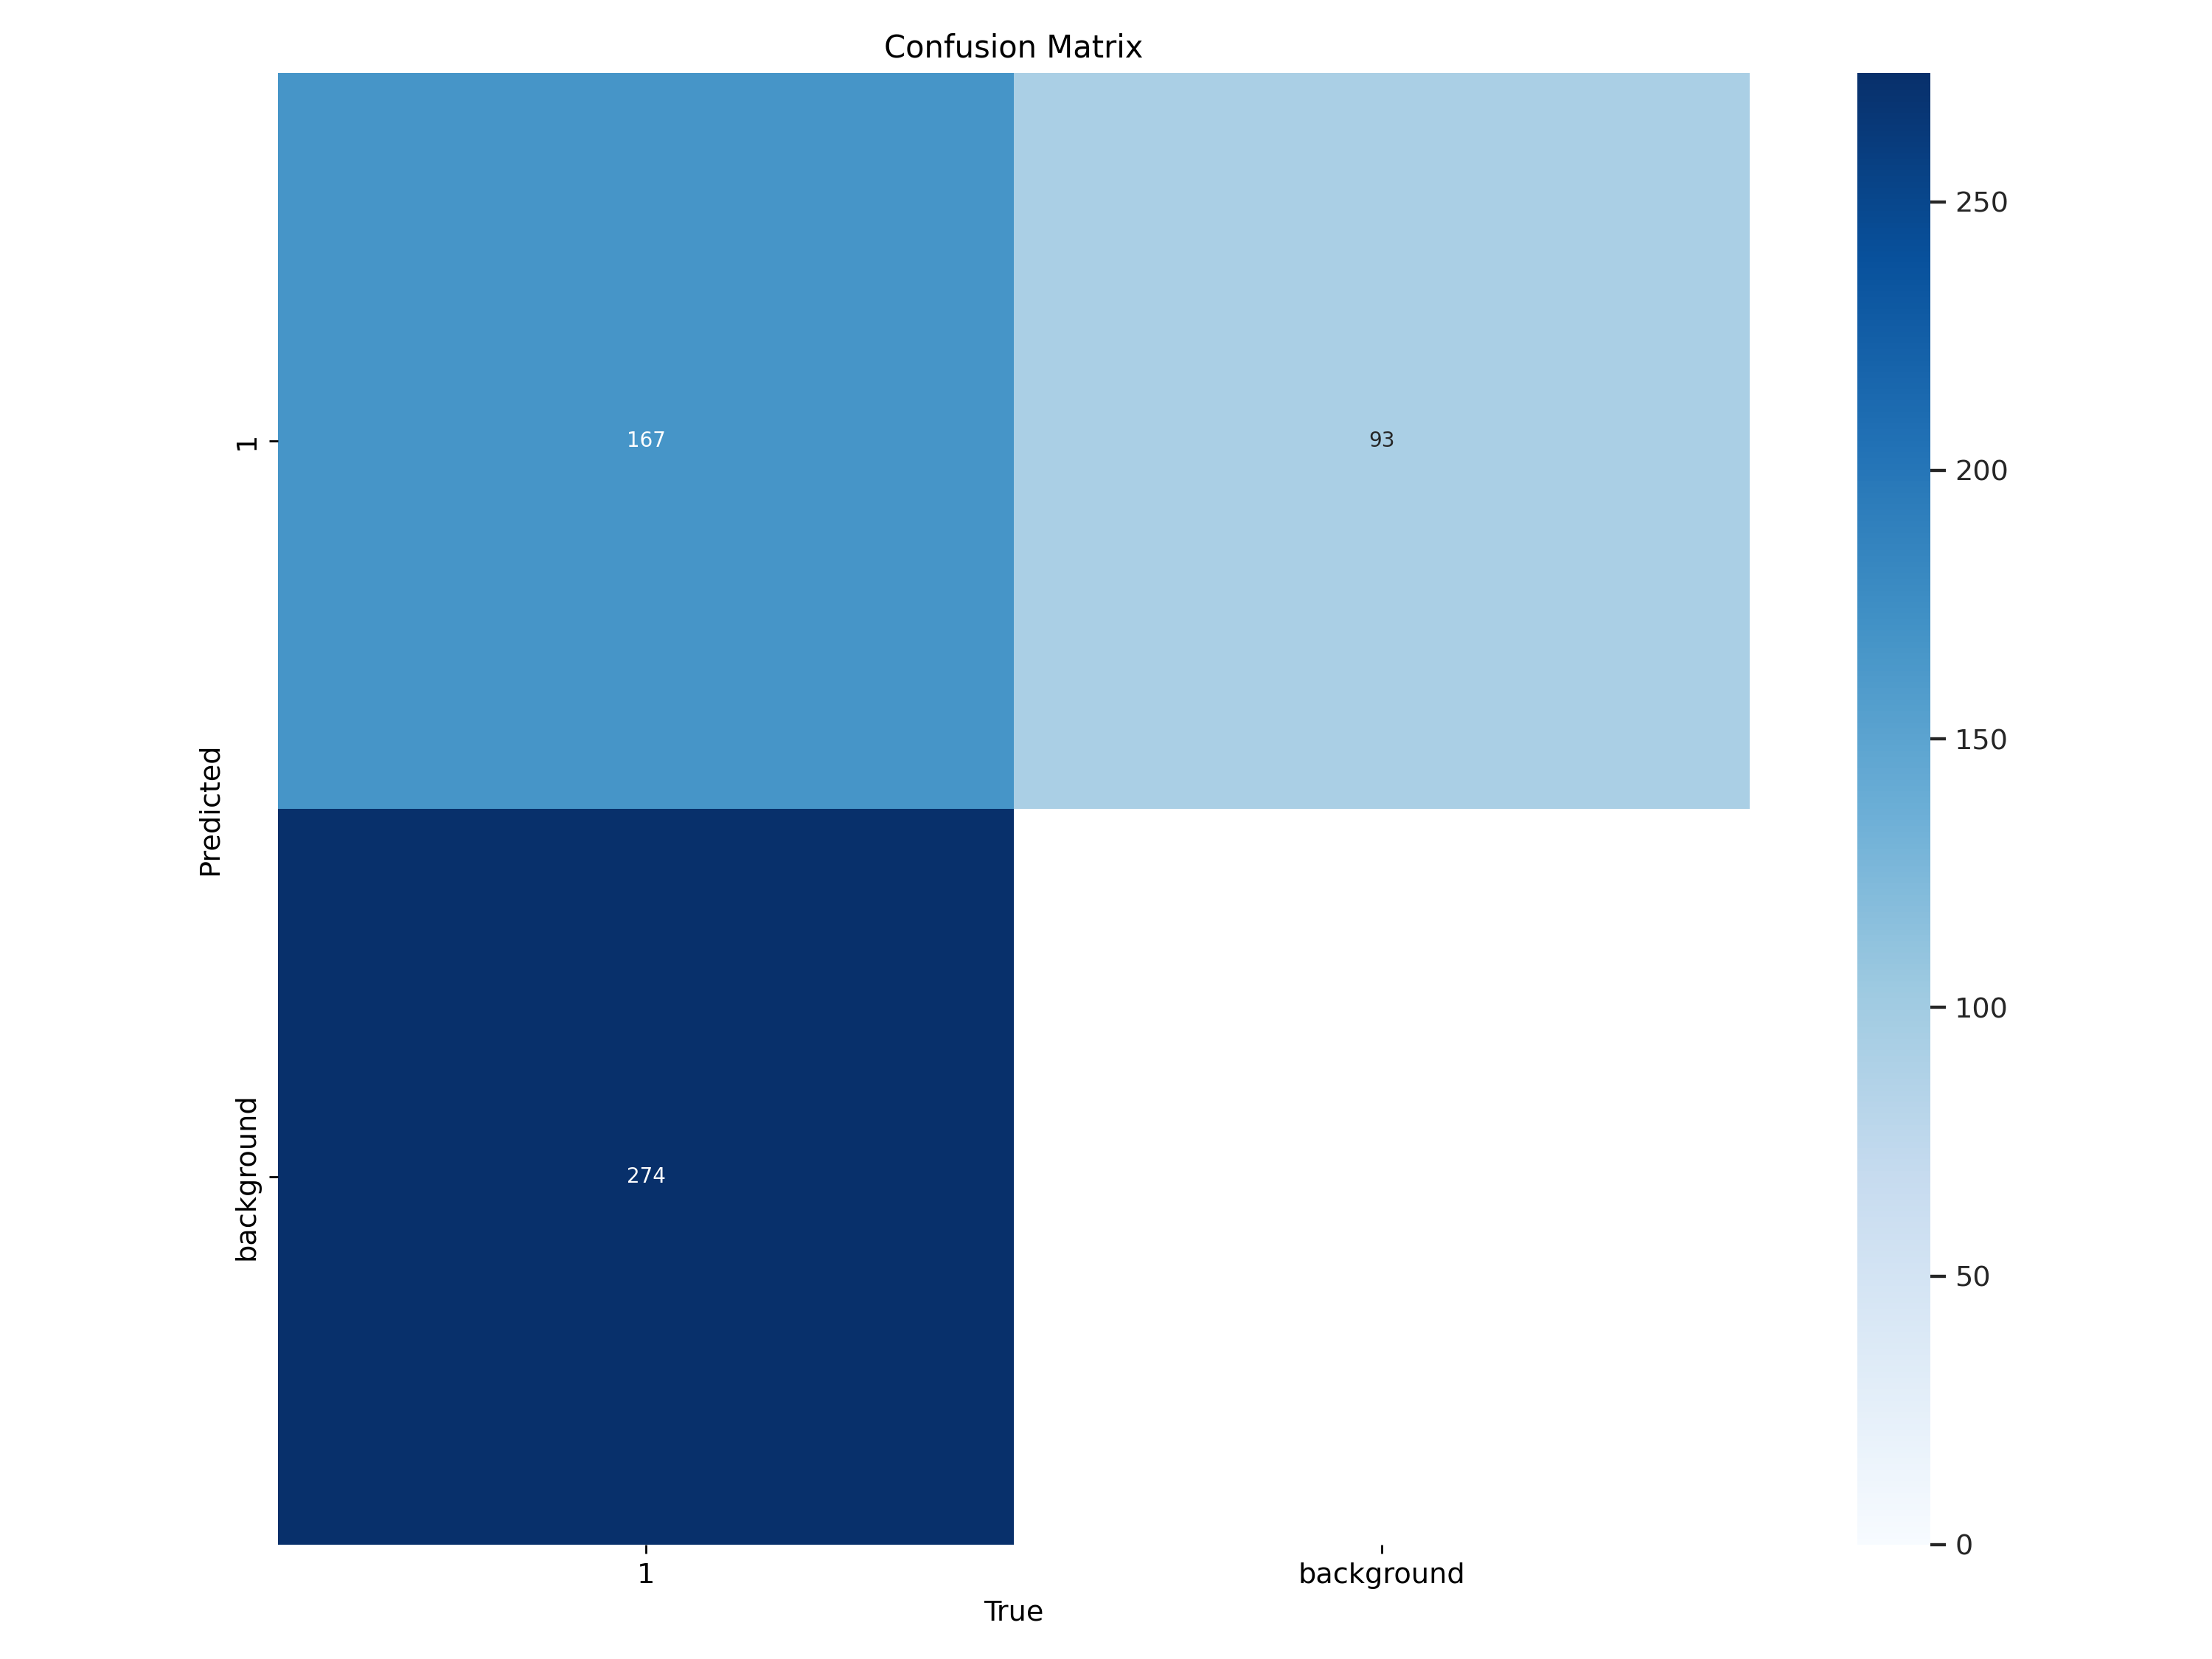

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',width=900)

Training and Validation Loss

/content


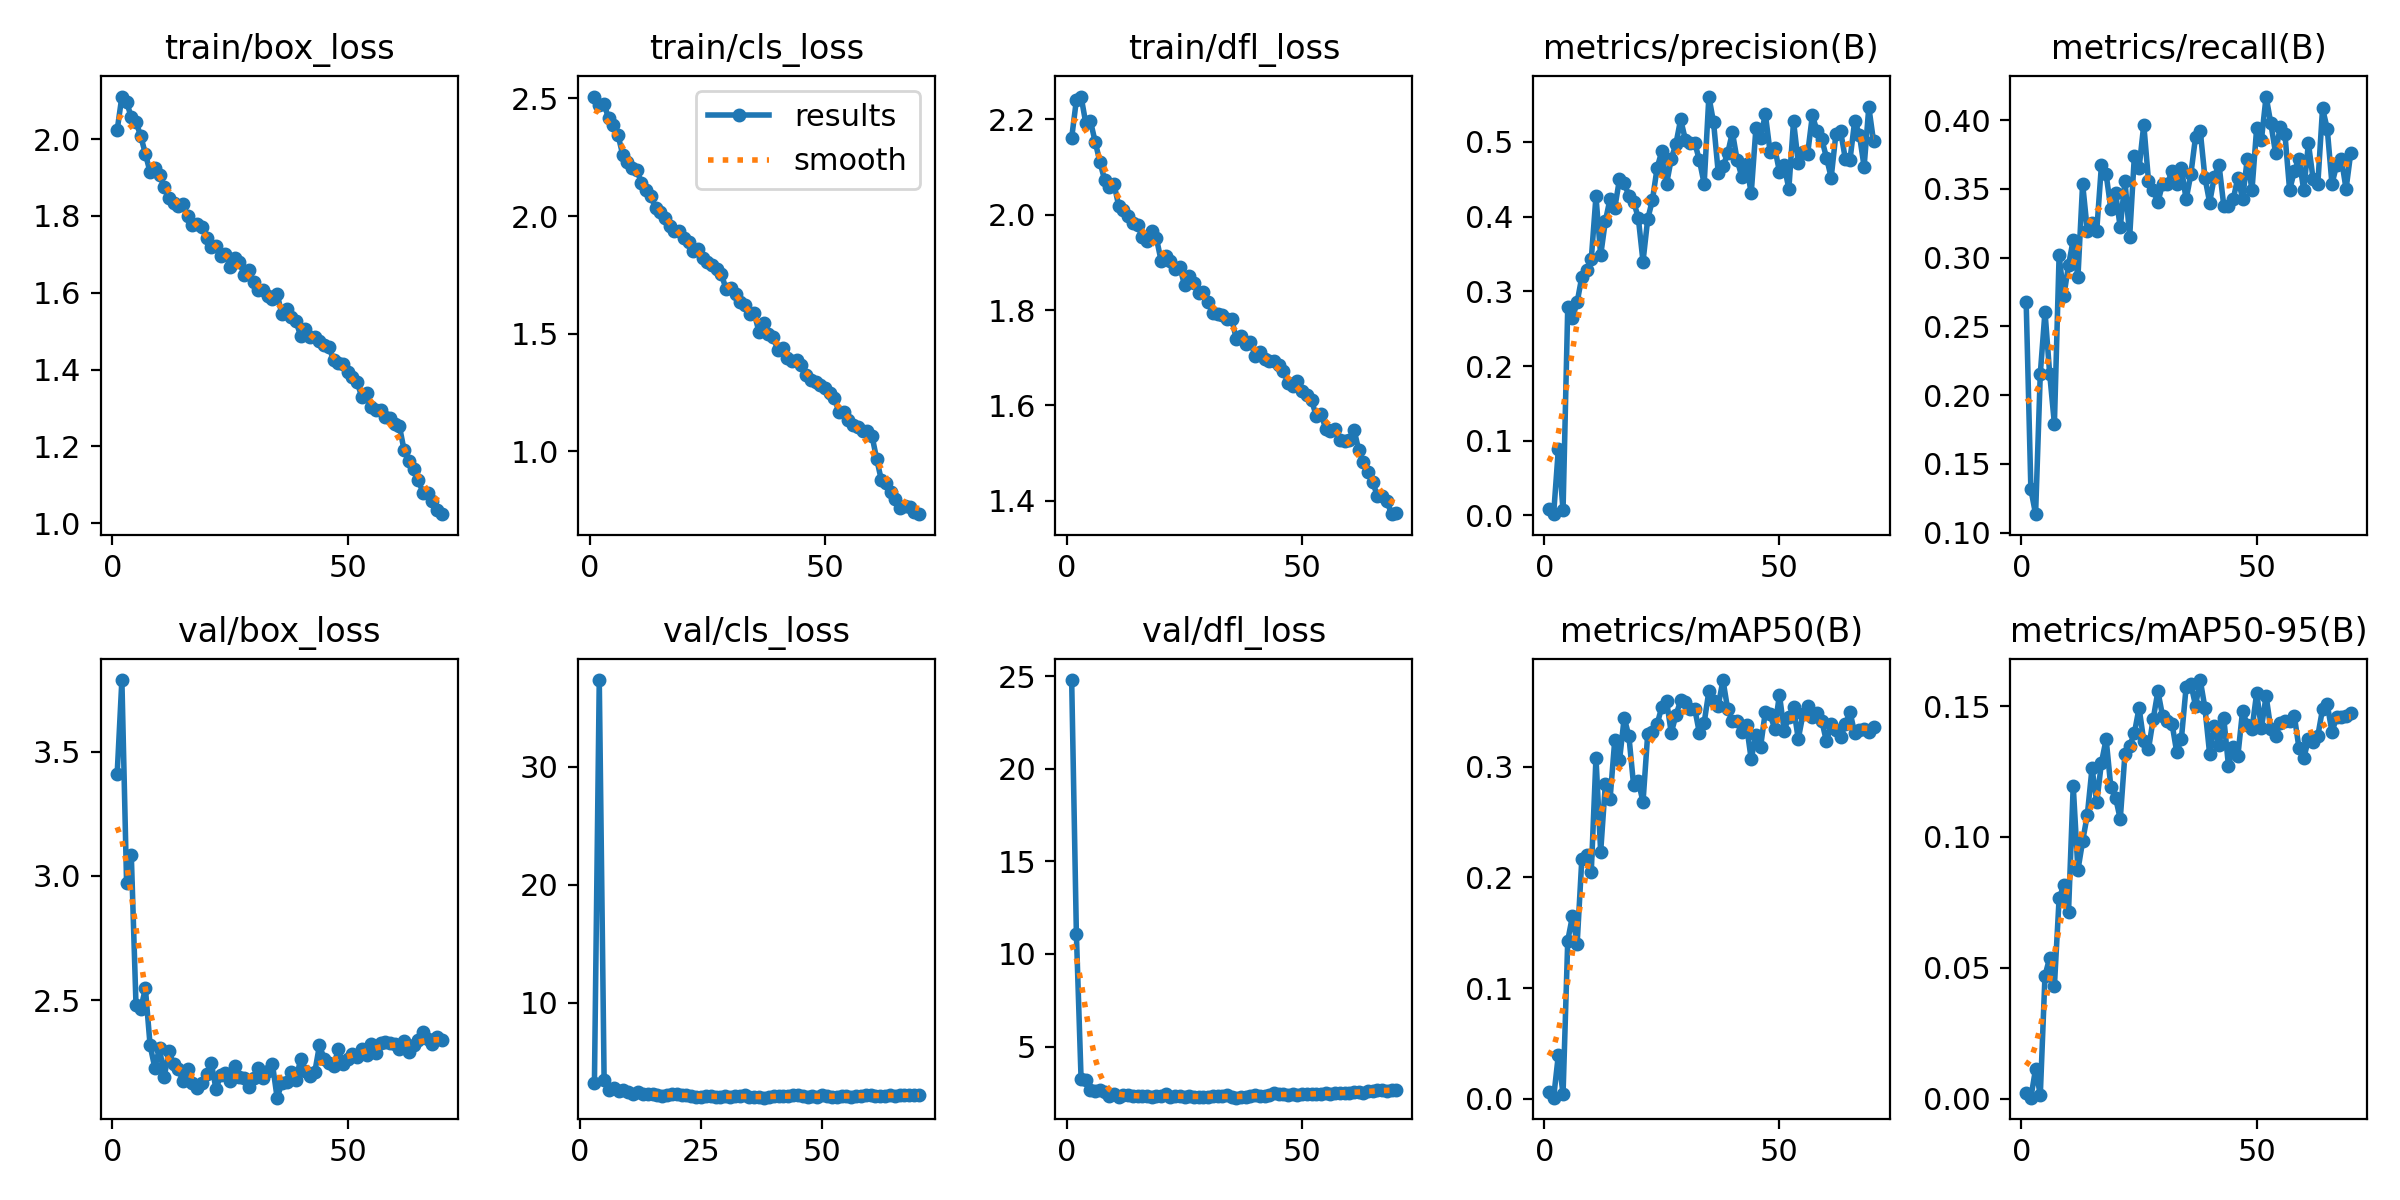

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png',width=900)

/content


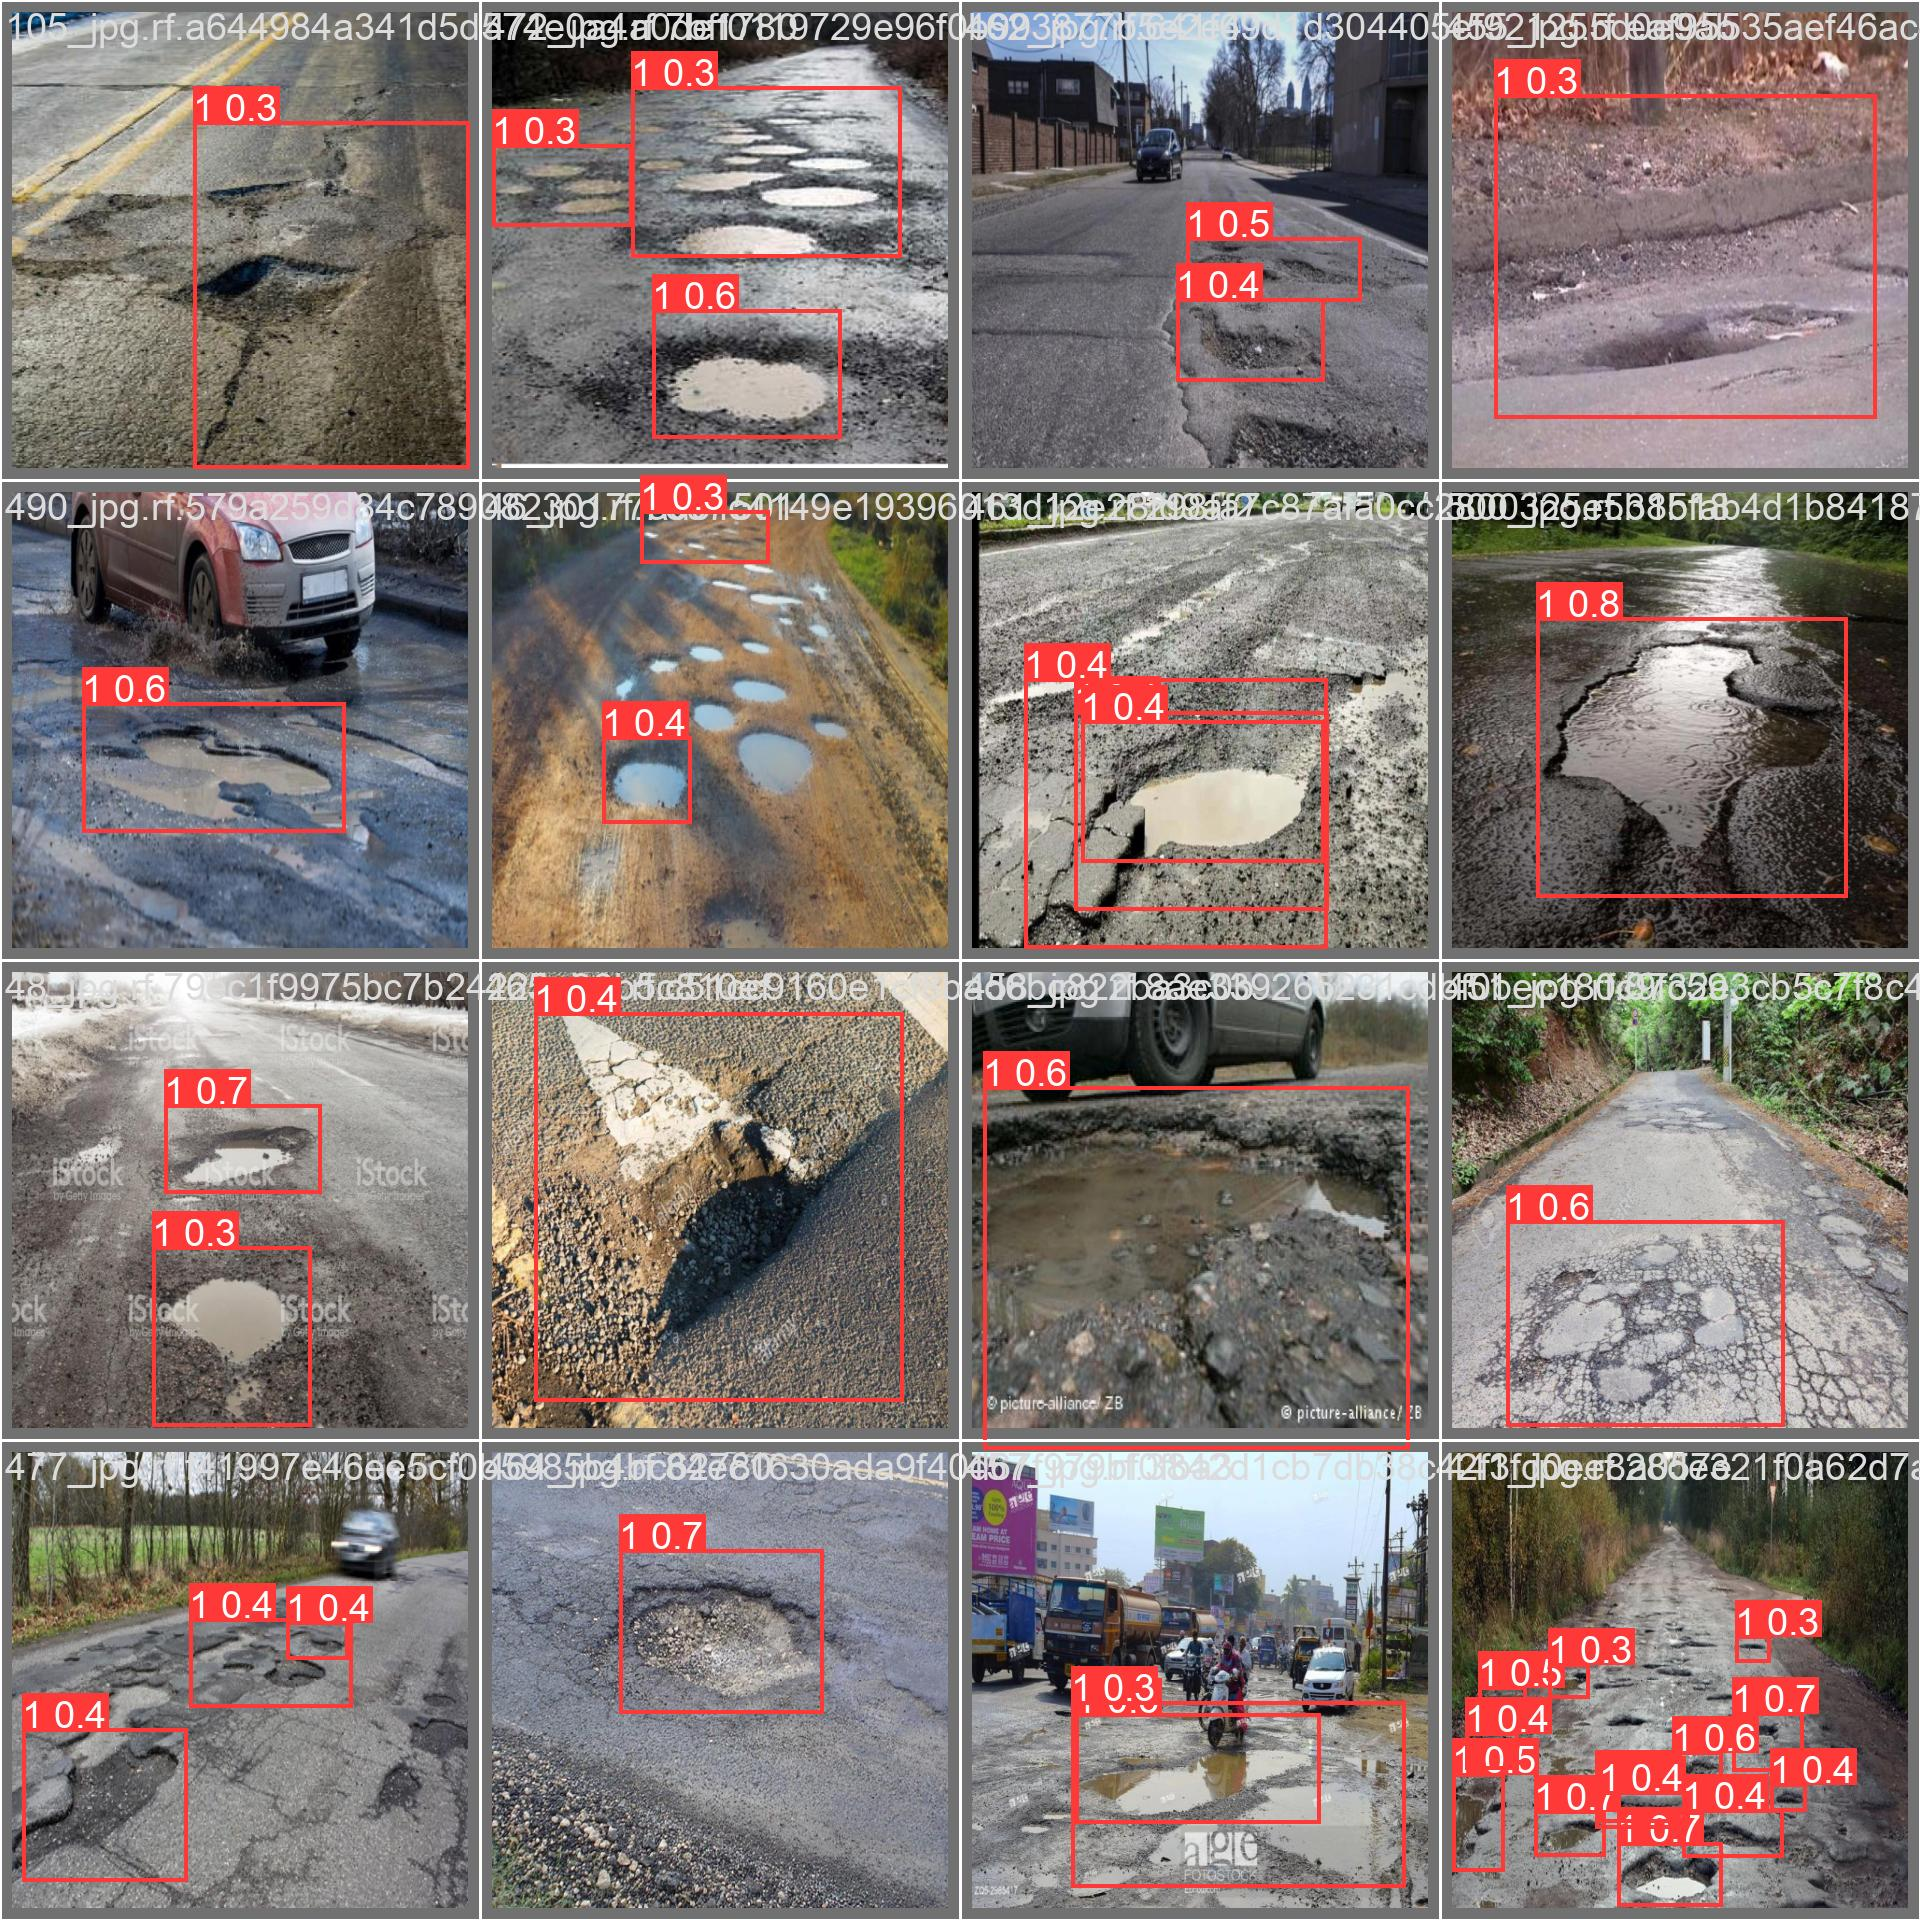

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg',width=900)

Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data=/content/Pothole-Detection-YOLOv8-1/data.yaml

/content
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Pothole-Detection-YOLOv8-1/valid/labels.cache... 122 images, 0 backgrounds, 0 corrupt: 100% 122/122 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 137, len(boxes) = 441. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:10<00:00,  1.31s/it]
                   all        122        441      0.468      0.392      0.378       0.16
Speed: 2.5ms preprocess, 20.5ms inference, 0.0ms loss, 29.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Pothole-Detection-YOLOv8-1/test/images

/content
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/60 /content/Pothole-Detection-YOLOv8-1/test/images/138_jpg.rf.455a4b35ba886df12bfc64cab93955bb.jpg: 608x608 1 1, 40.8ms
image 2/60 /content/Pothole-Detection-YOLOv8-1/test/images/143_jpg.rf.4e9114fcc95509c0862672b8c7700460.jpg: 608x608 5 1s, 36.2ms
image 3/60 /content/Pothole-Detection-YOLOv8-1/test/images/146_jpg.rf.4f987d6423b05e1629b1f1450014ca24.jpg: 608x608 4 1s, 36.1ms
image 4/60 /content/Pothole-Detection-YOLOv8-1/test/images/152_jpg.rf.bd5dccd85fb452cda8e04422246d14bb.jpg: 608x608 2 1s, 36.1ms
image 5/60 /content/Pothole-Detection-YOLOv8-1/test/images/153_jpg.rf.7a1880482a7714c626ef5139a69e19a3.jpg: 608x608 1 1, 27.8ms
image 6/60 /content/Pothole-Detection-YOLOv8-1/test/images/157_jpg.rf.350f938392634e66376f2cebd37febe6.jpg: 608x608 1 1, 28.0ms
image 7/60 /content/Pothole-Detection-YOLOv8-1/test

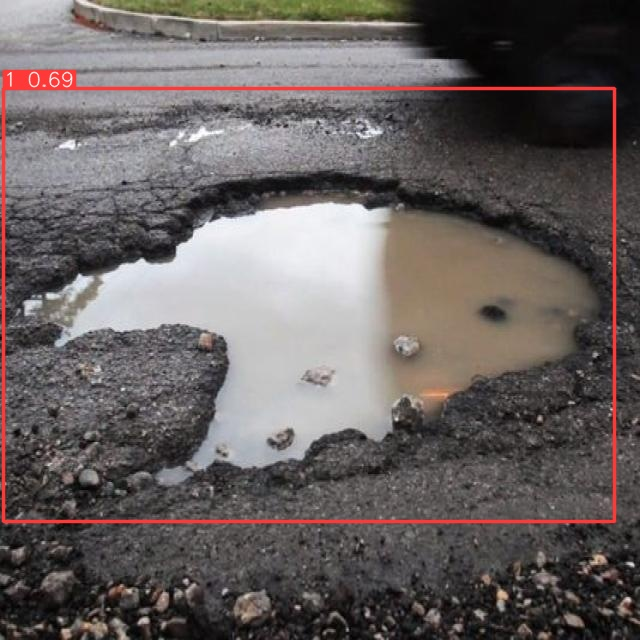

In [ ]:
Image("/content/runs/detect/predict/157_jpg.rf.350f938392634e66376f2cebd37febe6.jpg")

Testing on a Demo Video

In [23]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/324) /content/demo.mp4: 352x608 5 1s, 135.4ms
video 1/1 (frame 2/324) /content/demo.mp4: 352x608 5 1s, 24.6ms
video 1/1 (frame 3/324) /content/demo.mp4: 352x608 5 1s, 24.5ms
video 1/1 (frame 4/324) /content/demo.mp4: 352x608 5 1s, 24.5ms
video 1/1 (frame 5/324) /content/demo.mp4: 352x608 4 1s, 24.5ms
video 1/1 (frame 6/324) /content/demo.mp4: 352x608 3 1s, 20.9ms
video 1/1 (frame 7/324) /content/demo.mp4: 352x608 2 1s, 19.5ms
video 1/1 (frame 8/324) /content/demo.mp4: 352x608 1 1, 19.4ms
video 1/1 (frame 9/324) /content/demo.mp4: 352x608 2 1s, 19.4ms
video 1/1 (frame 10/324) /content/demo.mp4: 352x608 2 1s, 19.4ms
video 1/1 (frame 11/324) /content/demo.mp4: 352x608 4 1s, 17.2ms
video 1/1 (frame 12/324) /content/demo.mp4: 352x608 4 1s, 16.5ms
video 1/1 (frame 13/324) /content/demo.mp4: 352x608

## Display the Demo video

In [24]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [25]:
from IPython.display import HTML
from base64 import b64encode
import os
# Input video path
save_path = '/content/runs/detect/predict2/demo.avi'
#Compressed video path
compressed_path = "/content/result_compressed.mp4"
os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
# show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64,"+b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)